In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multitest import fdrcorrection

In [2]:
mtg = pd.read_csv("../metagenome_assembly/mapped_contigs/contig_abund_table.csv", index_col = 0)
metabol = pd.read_csv("../metagenome_assembly/mapped_contigs/metabolite_abund_table_corr.csv", sep = "\t")

In [5]:
fived = metabol.loc["5-dodecenoate (12:1n7)", :]

In [6]:
metabol.head()

,001_N,004_A,005_A,009_A,011_A,011_N,019_A,021_A,022_A,022_N,...,162_A,162_N,187_A,009_N,021_N,045_A,045_N,058_A,108_A,130_A
glycine,0.5100,1.0756,0.9940,1.5594,0.7573,1.2634,1.3935,0.9421,0.9275,0.9264,...,0.9672,0.6377,1.2098,0.8095,0.9967,0.4285,1.1304,3.2774,0.7596,0.7302
N-acetylglycine,0.3687,0.6869,1.3388,1.8708,0.3295,1.0136,0.7857,1.2633,1.5988,2.6078,...,0.6164,14.5834,1.1919,1.1769,1.0412,0.3752,1.0179,5.3272,0.8927,0.2250
sarcosine,0.3481,0.4647,0.2925,0.5180,2.5365,0.1634,2.4865,0.4972,0.1634,0.2993,...,0.1634,1.0402,0.1634,0.1634,0.1634,0.1634,0.1634,1.2931,0.1634,1.0788
dimethylglycine,1.1763,1.5106,1.5464,0.3985,1.2705,1.5349,0.6041,1.2636,1.1344,0.6558,...,1.0074,0.6544,1.0685,1.2046,1.2469,0.5769,7.8844,1.0866,1.8913,0.9044
betaine,0.9161,5.8481,0.9360,0.9073,4.5461,0.8073,2.4332,1.7142,0.1002,0.8722,...,0.2952,2.9924,0.7837,0.3922,0.9641,0.6684,1.5673,1.0146,1.0360,0.7972


In [35]:
print(mtg.shape)
mtg.head()

(348317, 169)


,001_N,004_A,005_A,009_A,011_A,011_N,019_A,021_A,022_A,022_N,...,162_A,162_N,187_A,009_N,021_N,045_A,045_N,058_A,108_A,130_A
c_000000000001,0,0,0,0,0,0,0,0,0,79,...,0,0,185,0,70,0,0,146,0,6
c_000000000002,33,23,692,355,0,0,0,103,4,46,...,0,124,134,166,2,2,0,956,181,46
c_000000000003,0,0,0,0,0,0,0,0,0,63,...,0,0,20,0,8,0,0,111,0,0
c_000000000004,14,0,22,0,80,1,42,55,4,0,...,83,47,7319,104,315,44,0,971,22,8
c_000000000005,0,0,0,0,0,0,0,0,0,78,...,0,0,0,0,0,0,0,0,0,0


[Text(0.5, 0, '# contigs in sample')]

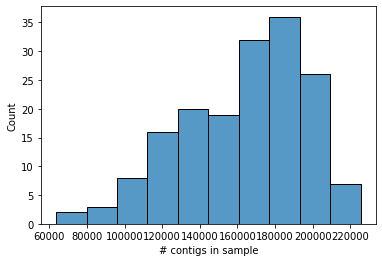

In [10]:
import seaborn as sns
present = mtg > 0
sums = present.sum(axis = 0)
ax = sns.histplot(sums)
ax.set( xlabel = "# contigs in sample")

# Normalize by contig size

In [22]:
contig_fasta = pd.read_csv("../metagenome_assembly/mapped_contigs/merged_contigs_unique_fixed.fa", header = None)

In [103]:
contig_ids = contig_fasta.iloc[::2, :].values
sequences = contig_fasta.iloc[1::2, :].values

keep_set = set(mtg.index.values)
keep = [i[0][1:] in keep_set for i in contig_ids]
sequences = sequences[keep]
lengths = [len(i[0]) for i in sequences]

mtg_norm = mtg.div(lengths, axis = 0)

In [116]:
pvals = mtg_norm.apply(lambda row: spearmanr(fived, row)[1], axis = 1)

C:\Users\kitikomp\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [93]:
corrs = mtg_norm.apply(lambda row: spearmanr(fived, row)[0], axis = 1)

In [140]:
from statsmodels.stats.multitest import fdrcorrection
corrected = fdrcorrection(pvals.values, alpha = 0.05)
reject_hyp = corrected[0]
pvals_corrected = corrected[1]

In [153]:
#with open('pvalues.txt', 'w') as f:
#    for value in pvals.values:
#        f.write("%s\n" % value)


#In R beacuse the correction just will not work properly in python
#p_adj <- p.adjust(pvalues[,1], 'fdr')
#p_adj[p_adj < .05]

p_adj = [0.04731651, 0.04731651]

In [118]:
mtg.loc[reject_hyp, :]

,001_N,004_A,005_A,009_A,011_A,011_N,019_A,021_A,022_A,022_N,...,162_A,162_N,187_A,009_N,021_N,045_A,045_N,058_A,108_A,130_A
c_000000146032,14,2,0,0,2,51,12,4,16,12,...,0,4,11,6,5,0,12,0,4,0
c_000000322516,0,0,0,0,0,0,0,0,0,0,...,56,10,0,0,0,0,0,2,0,0


In [161]:
len(sequences)

348317

In [169]:
df = pd.DataFrame({"Contig_id":mtg.index.values[reject_hyp],
              "Correlation w/ 5D" : np.array(corrs)[reject_hyp],
              "Pvalue" : np.array(pvals)[reject_hyp],
            "Pvalue corrected": p_adj,
             "Sequence": np.squeeze(sequences[reject_hyp])})

df.to_csv("../results/contig_correlation_5d/contig_correlation_5d.csv")